In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

In [2]:
data = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Data Folder/Dummy Data HSS__1_.csv",header = 0)
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [3]:
dfy= data.drop('Influencer',axis=1)
Q1 = dfy.quantile(0.25)
Q3 = dfy.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dfy < (Q1 - 1.5 * IQR)) |(dfy > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = dfy[outliers].index

outliers_count = outliers.sum()
outliers_count

29

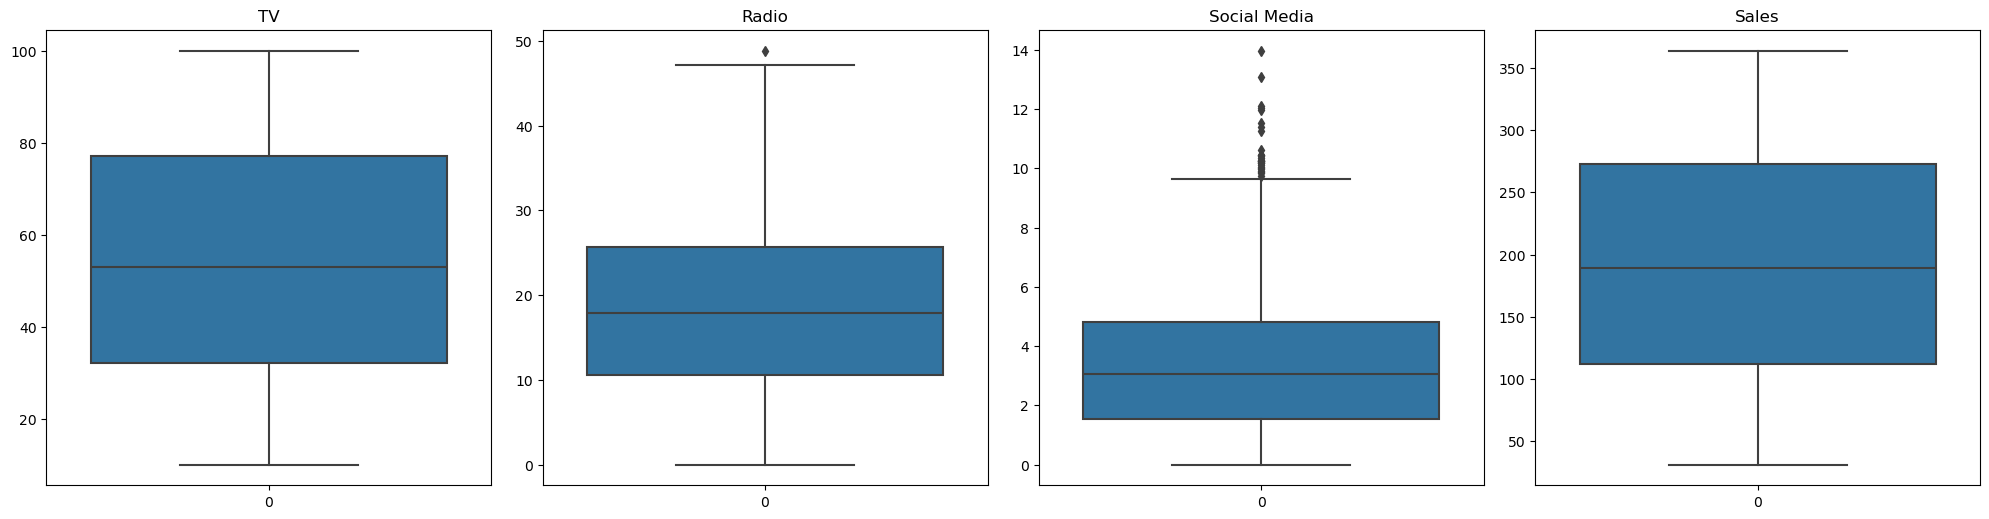

In [4]:
plt.figure(figsize=(20,10))
for i,column in enumerate(dfy.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=dfy[column])
    plt.title(column)
plt.tight_layout()
plt.show()

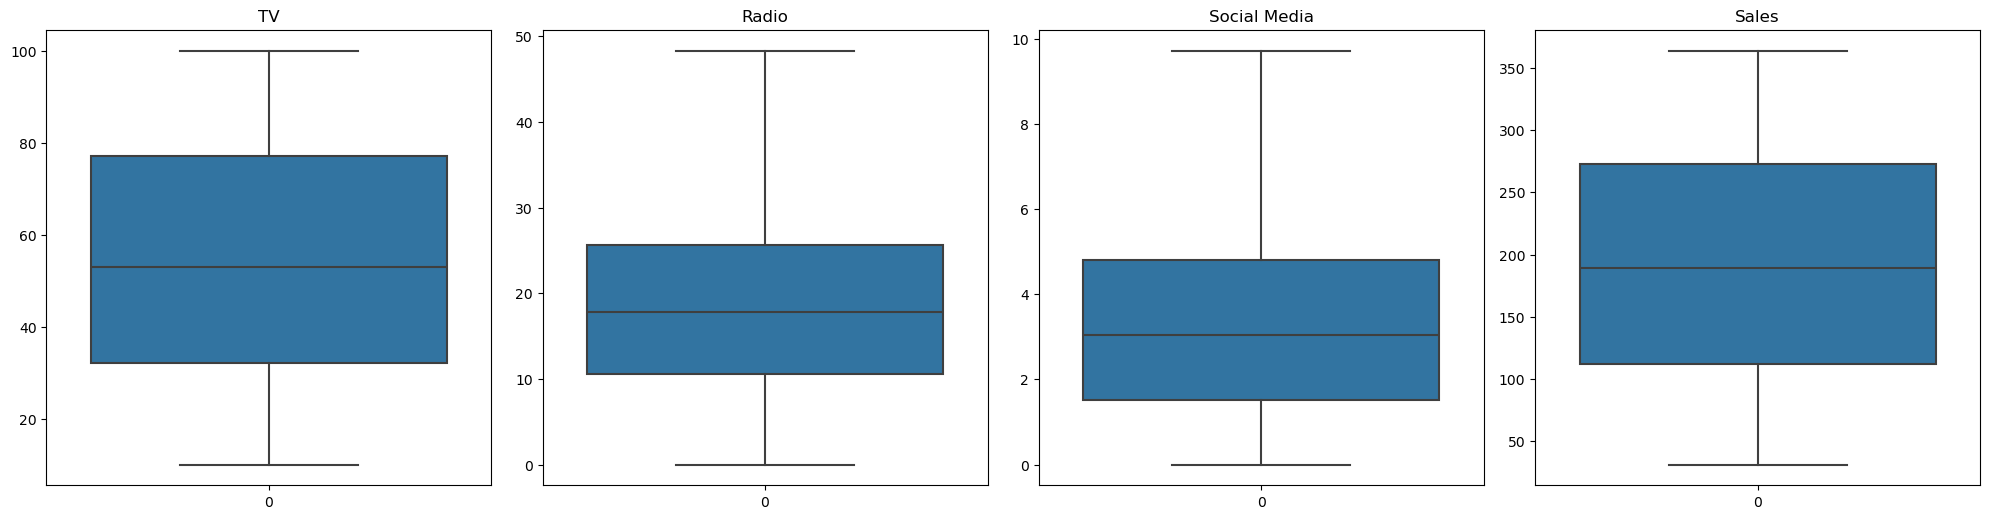

In [5]:
df_filtered = dfy.copy()

for feature in Q1.index:
    LB = Q1[feature] - 1.5 * IQR[feature]
    UB = Q3[feature] + 1.5 * IQR[feature]
    df_filtered[feature] = df_filtered[feature].clip(lower=LB, upper=UB)

plt.figure(figsize=(20,10))
for i,column in enumerate(df_filtered.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [6]:
df_filtered['Influencer'] = data ['Influencer']
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
 4   Influencer    4572 non-null   object 
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
df_filtered = pd.get_dummies(df_filtered)

In [8]:
del df_filtered['Influencer_Nano']

In [9]:
df_filtered.fillna(df_filtered.mean(),inplace=True)

In [91]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TV                4572 non-null   float64
 1   Radio             4572 non-null   float64
 2   Social Media      4572 non-null   float64
 3   Sales             4572 non-null   float64
 4   Influencer_Macro  4572 non-null   bool   
 5   Influencer_Mega   4572 non-null   bool   
 6   Influencer_Micro  4572 non-null   bool   
dtypes: bool(3), float64(4)
memory usage: 156.4 KB


In [11]:
df_filtered["Influencer_Mega"] = df_filtered['Influencer_Mega'].astype(float)
df_filtered.describe()

,TV,Radio,Social Media,Sales,Influencer_Mega
count,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.160239,3.317700,192.466602,0.253281
std,26.096461,9.672355,2.190098,93.071947,0.434938
min,10.000000,0.000684,0.000031,31.199409,0.000000
25%,32.000000,10.546519,1.529879,112.397660,0.000000
50%,53.000000,17.875181,3.057150,189.632530,0.000000
75%,77.000000,25.647476,4.805832,272.414914,1.000000
max,100.000000,48.335389,9.727122,364.079751,1.000000


In [92]:
correlation_matrix = df_filtered.corr()
sales_correlation_matrix = correlation_matrix['Sales'].drop('Sales')
sales_correlation_matrix

TV                  0.996652
Radio               0.867382
Social Media        0.530312
Influencer_Macro    0.019267
Influencer_Mega    -0.011701
Influencer_Micro   -0.004099
Name: Sales, dtype: float64

In [96]:
x_tv = sn.add_constant(df_filtered['TV'])
y_sales = df_filtered['Sales']

lm_sn_1 = sn.OLS(y_sales,x_tv).fit()
lm_sn_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.792e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:28:56   Log-Likelihood:                -15765.
No. Observations:                4572   AIC:                         3.153e+04
Df Residuals:                    4570   BIC:                         3.155e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2849      0.259      1.100      0.271      -0.223       0.793
TV             3.5545      0.004    824.111      0.000       3.546       3.563
==============================================================================
Omnibus:                     2844.142   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12214106.398
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                     256.200   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
x_tv = df_filtered[['TV']]
y_sales = df_filtered['Sales']

lm_skl_1 = LinearRegression()
lm_skl_1.fit(x_tv, y_sales)

print(lm_skl_1.intercept_,'\n',lm_skl_1.coef_[0])

0.2849025970087098 
 3.554519560527744


In [99]:
x_multi = df_filtered.drop(['Sales'],axis = 1).astype(float)
x_multi_coef = sn.add_constant(x_multi).astype(float)

y_multi = df_filtered['Sales'].astype(float)

# Using Statsmodels.api

lm_sn_multi = sn.OLS(y_multi,x_multi_coef).fit()
print(lm_sn_multi.summary())

# Using Sklearn

lm_skl_multi = LinearRegression()
lm_skl_multi.fit(x_multi,y_multi)
print(lm_skl_multi.intercept_,'\n',lm_skl_multi.coef_)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:35:58   Log-Likelihood:                -15748.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1960      0.327  

In [101]:
train_x,test_x,train_y,test_y = train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)

lm_skl_multi_train = LinearRegression()
lm_skl_multi_train.fit(train_x,train_y)


print("R2 Score for training data:")
print(r2_score(train_y,lm_skl_multi_train.predict(train_x)))
print("R2 Score for testing data:")
print(r2_score(test_y,lm_skl_multi_train.predict(test_x)))

R2 Score for training data:
0.9929813306195718
R2 Score for testing data:
0.9948770001878208


In [105]:
scaler = StandardScaler().fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

ridge_multi = Ridge(alpha=0.7)

ridge_multi.fit(train_x_scaled,train_y)
print("R2 Score for Ridge Regression model with alpha = 0.7 is :")
print(r2_score(test_y,ridge_multi.predict(test_x_scaled)))

R2 Score for Ridge Regression model with alpha = 0.7 is :
0.9948719975807012


In [111]:
pr = np.logspace(-2,8,100)
train_scores,test_scores = validation_curve(Ridge(),train_x_scaled,train_y,param_name='alpha',param_range= pr,scoring='r2')

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

max(test_mean)

0.9929565245606957